![Titre](images/Titre-Jupyter-1.png)

## La physique de l'ascenseur spatial

Nous allons d'abord charger les librairies Python de Mathematiques (numpy) et de représentation graphique (matplotlib).   
Sans numpy nous n'aurions pas de fonction racine (sqrt).   
Quant à matplotlib, il s'agit d'une librairie qui fonctionne un peu comme la calculatrice du Lyçée et nous permet de tracer des courbes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Définissons ensuite les constantes utilisées:

In [2]:
G  = 6.67E-11    # Constante de gravitation universelle en m(3)*s(-2)*kg(-1)
Mt = 5.98E24     # Masse de la terre en kg  
Rt = 6378E3      # Rayon  de la terre en m

# 1. Movement orbital

Nous devons calculer la vitesse de rotation de la terre et la hauteur de l'orbite géostationnaire.
Nous en profittereons aussi pour calculer l'accélération et les vitesses orbitales et linéaires à différentes orbites.
Calcul de la vitesse de rotation de la terre, en radians par seconde:

### 1.1. Calcul de la vitesse de rotation de la terre
Soit Wt la vitesse angulaire de rotation de la terre, en radians par seconde:

In [3]:
Wt = (2*np.pi)/(24*60*60)
print("Vitesse de rotation de la terre = ",Wt,"Radians/seconde")
print("Vitesse de rotation de la terre = ",round (Wt,7),"Radians/seconde")

Vitesse de rotation de la terre =  7.27220521664304e-05 Radians/seconde
Vitesse de rotation de la terre =  7.27e-05 Radians/seconde


### 1.2 Fonctions accélération
Nous allons définir des fonctions pour l'accélération gravitationnelle et l'accélération centrifuge.

In [6]:
def AccGravitationnelle (r):
    AccGravitationnelle = (G*Mt)/(r**2)
    return AccGravitationnelle

def AccCentrifuge (r):
    AccCentrifuge = r * (Wt**2)
    return AccCentrifuge

def AccTotale (r):
    AccTotale = AccGravitationnelle(r) - AccCentrifuge(r)
    return AccTotale

**Exemple:** Calcul de l'accélération gravitationnelle à la surface de la terre:

In [7]:
print("Accélération gravitationnelle à la surface de la terre:",AccGravitationnelle(Rt), "(m.s-2)")
print("Accélération gravitationnelle à la surface de la terre:",round(AccGravitationnelle(Rt),2), "(m.s-2)")

Accélération gravitationnelle à la surface de la terre: 9.805234578215078 (m.s-2)
Accélération gravitationnelle à la surface de la terre: 9.81 (m.s-2)


**Exemple:** Calcul de l'accélération centrifuge à la surface de la terre:

In [8]:
print("Accélération centrifuge à la surface de la terre:",round(AccCentrifuge(Rt),9), "(m.s-2)")

Accélération centrifuge à la surface de la terre: 0.033730033 (m.s-2)


Conclusion: 

### 1.3 Calcul de la hauteur de l'orbite geostationnaire
Nous pouvons calculer la valeur exacte de l'orbite geostationnaire. Cette valeur doit 

In [9]:
Rg =((G*Mt)/(Wt**2))**(1/3)
Hg = (Rg - Rt)

print("Rayon de l'orbite geostationnaire:", int (Rg/1000), 'km')
print("Hauteur de l'orbite geostationnaire:", int (Hg/1000), 'km')


Rayon de l'orbite geostationnaire: 42250 km
Hauteur de l'orbite geostationnaire: 35872 km


#### Représentation graphique:
Nous allons tracer les courbes des deux accélérations, gravitationelle et centrifuge.
Elles devraient se croiser dans un point d'abcisse r = 42241 km.
Le rayon r prendra des valeurs entre 6.000 km et 160.000 km

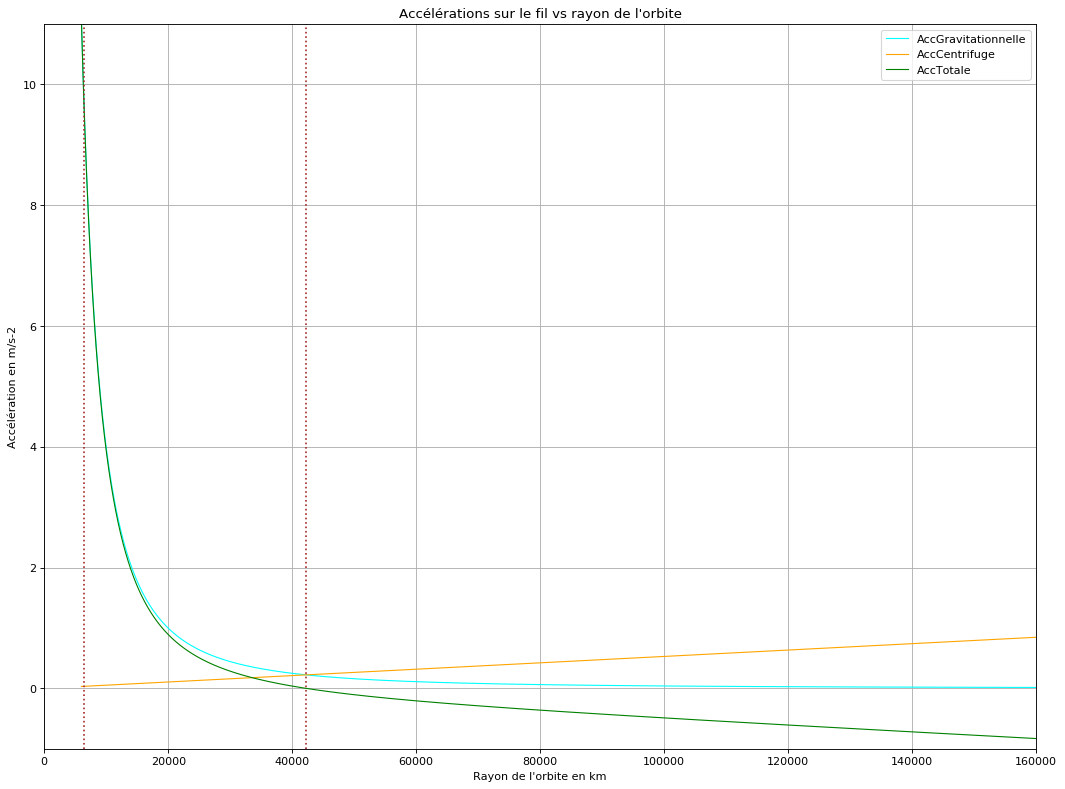

In [10]:
r = np.arange(6E6, 160E6, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(r_km,  AccGravitationnelle(r), color="cyan",   linewidth=1, label='AccGravitationnelle')
plt.plot(r_km,  AccCentrifuge(r),       color="orange", linewidth=1, label='AccCentrifuge' )
plt.plot(r_km,  AccTotale(r),           color="green",  linewidth=1, label='AccTotale' )

plt.axvline(x=Rt*1E-3, linestyle=":", color="brown")
#plt.annotate('Rt', xy=(1000, 0), xycoords='data', xytext=(Rt, 0))

plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération en m/s-2")
plt.axis([0, 160E3, -1, 11])

plt.grid()
plt.title("Accélérations sur le fil vs rayon de l'orbite")
plt.legend(loc='upper right')
plt.savefig('images/Accelerations.png')

plt.show()



Nous observons que la Force totale s'annule pour le rayon de l'orbite géostationnaire. Cette courbe verte nous montre la force par unité de longueur et par unité de masse exercée sur chaque point du cable. La force est négative (attractive) au desssous de l'orbite géostationnaire et elle est positive au dessus.


# 2. Le cable
Notre but dans cette deuxième partie est de 

## 2.1 L'idée d'equilibre:
Nous voulons comprendre pourquoi le cable est capable de se maintenir verticalement sans exercer de force sur la surface terrestre. 
Intuitivement, il semble que le cable sera en équilibre lorsque les deux parties exerceront la même force, le même poids,   
Nous allons introduire une autre fonction que nous appelerons Tension_cable

In [14]:
Rf = 155000

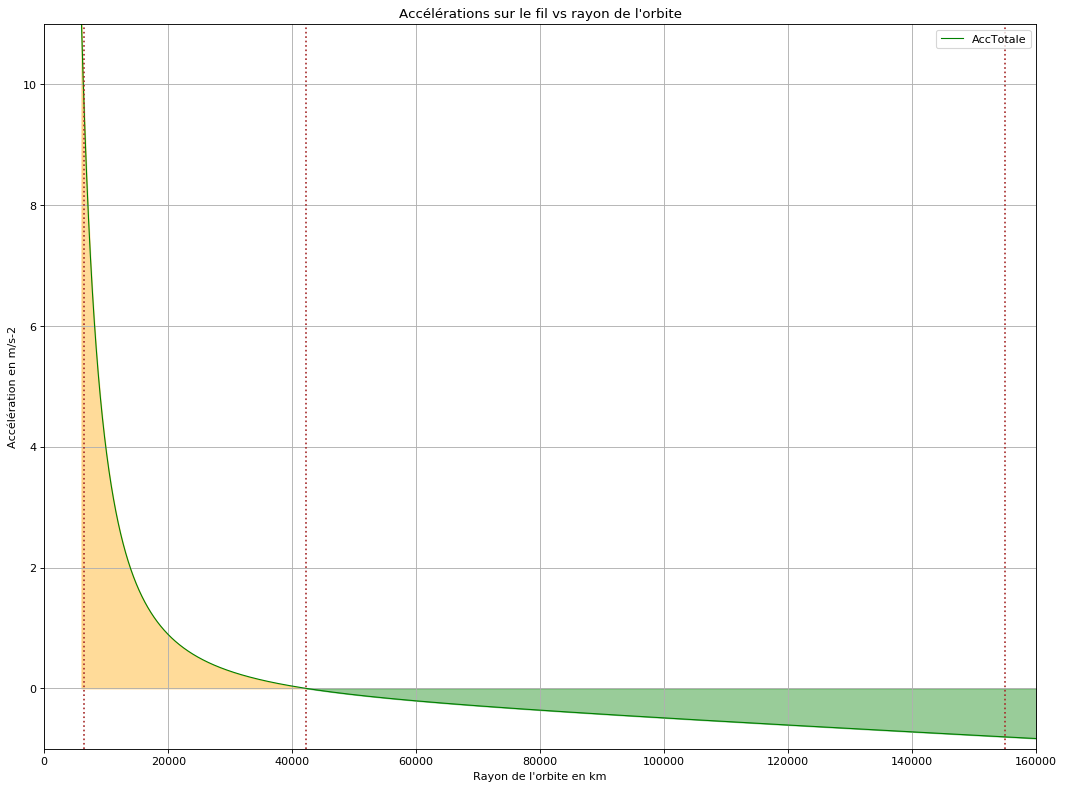

In [16]:
r = np.arange(6E6, 160E6, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(r_km,  AccTotale(r),           color="green",  linewidth=1, label='AccTotale' )

plt.axvline(x=Rt*1E-3, linestyle=":", color="brown")

plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")
plt.axvline(x=Rf,      linestyle=":", color="brown")

plt.fill_between(r_km, AccTotale(r), 0, r < Rg, color='orange', alpha=.4)
plt.fill_between(r_km, AccTotale(r), 0, r > Rg, color="green", alpha=.4)

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération en m/s-2")
plt.axis([0, 160E3, -1, 11])

plt.grid()
plt.title("Accélérations sur le fil vs rayon de l'orbite")
plt.legend(loc='upper right')
plt.savefig('images/Accelerations.png')

plt.show()


## 2.2 La modélisation du cable:
Nous voulons comprendre pourquoi le cable est capable de se maintenir verticalement sans exercer de force sur la surface terrestre. 
Intuitivement, il semble que le cable sera en équilibre lorsque les deux parties exerceront la même force, le même poids,   

Nous allons introduire une autre fonction que nous appelerons IntegraleAcc. Elle nous servira de repère pour vérifier 

Nombre de maillons: 16 ; Longueur d'un maillon: 2242.0 km


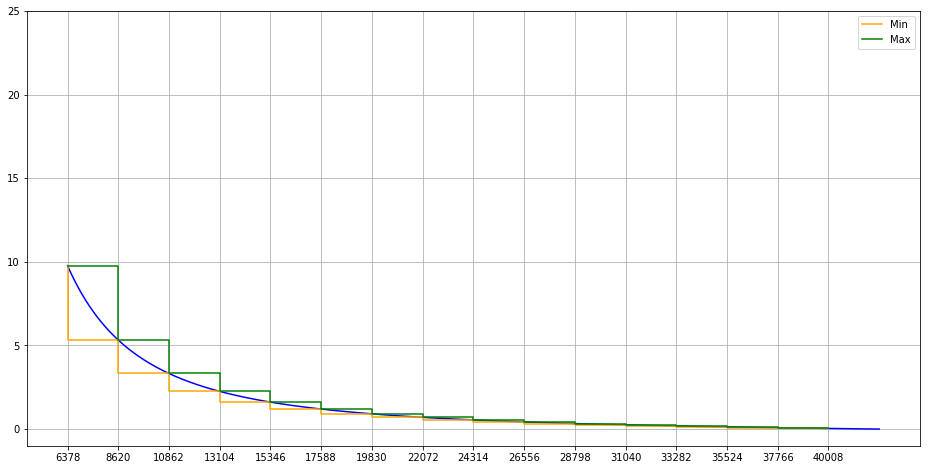

In [31]:
NombreMaillons = 16

LongueurMaillon = 1E-3*(Rg-Rt)/NombreMaillons
print("Nombre de maillons:", NombreMaillons, "; Longueur d'un maillon:",round(LongueurMaillon,0), "km")

fig, ax = plt.subplots(figsize=(16, 8))

ax.set_xticks(np.arange(Rt*1E-3, Rg*1E-3, LongueurMaillon))

r = np.arange(Rt, Rg, 1E3)
r_km = r*1E-3

plt.plot(r_km, AccTotale(r), color="blue")

r = np.arange(Rt, Rg, LongueurMaillon*1E3)
r_km = r*1E-3

plt.step(r_km, AccTotale(r), where='pre',  label='Min', color="orange")
plt.step(r_km, AccTotale(r), where='post', label='Max', color="green")

ax.grid(markevery=LongueurMaillon)

plt.ylim(-1, 25)
plt.legend()
plt.savefig('images/Integrale1.png')
plt.show()

#### Solution analytique de l'intégrale:

In [14]:
def IntegraleAcc (r):
    IntegraleAcc = G*Mt*( -1/r - (r**2)/(2*Rg**3) + 1/Rt + (Rt**2)/(2*Rg**3))
    return IntegraleAcc

#### Approximation numérique de l'intégrale:

6378000.0
Nombre de maillons: 32 ,Longueur d'un maillon: 1121015.0 km


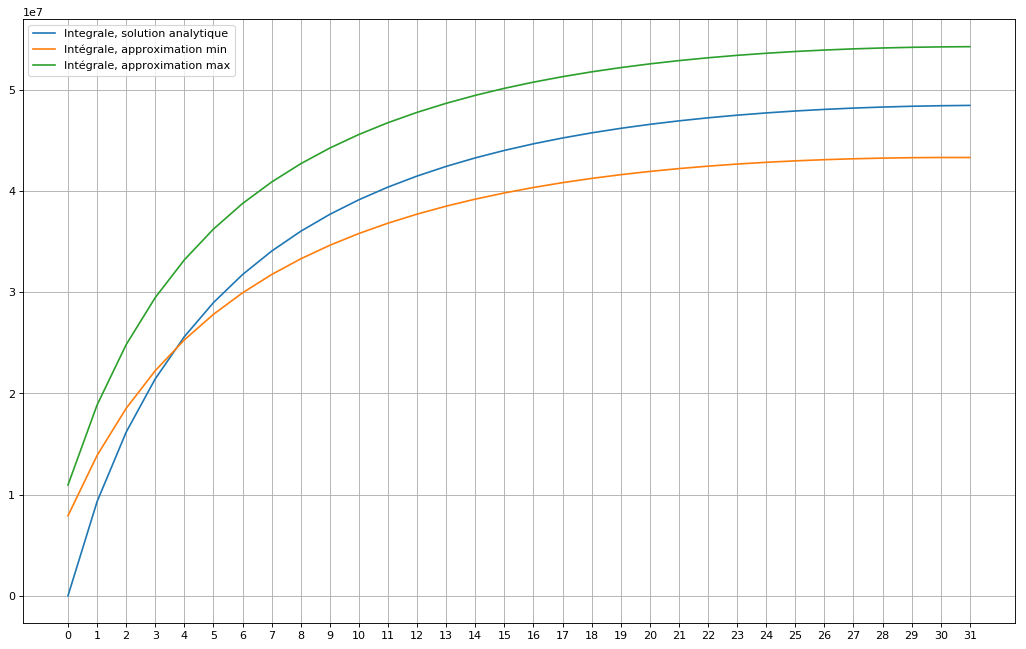

In [22]:
NombreMaillons = 32
print(Rt)
LongueurMaillon = (Rg-Rt)/NombreMaillons
print("Nombre de maillons:", NombreMaillons, ",Longueur d'un maillon:",round(LongueurMaillon,0), "km")

# Maillons est la liste 
Maillons    = [0]*NombreMaillons
Integrale   = [0]*NombreMaillons
Int_min     = [0]*NombreMaillons
Int_max     = [0]*NombreMaillons

#Calculer les
for i in range (NombreMaillons): 
    Maillons[i]    = i
    Integrale[i] = IntegraleAcc(Rt + i*LongueurMaillon)
    
    Int_max [i] = Int_max[i-1] + LongueurMaillon * AccTotale (Rt + (i)*LongueurMaillon )
    Int_min [i] = Int_min[i-1] + LongueurMaillon * AccTotale (Rt + (i+1)*LongueurMaillon )
    
    #print("Maillon:", i, "Intégrale min", Int_min[i], "Integrale max", Int_max[i])

# Représentation graphique:
r = np.arange(Rt, Rg, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(Maillons, Integrale, label="Integrale, solution analytique")

plt.plot(Maillons, Int_min, label='Intégrale, approximation min')
plt.plot(Maillons, Int_max, label='Intégrale, approximation max')

plt.xticks(Maillons)

plt.grid()
plt.legend()
plt.savefig('images/AccTotaleCalculIntegrale.png')


plt.show()


## 2.3 Calcul du contrepoids et de la longueur du cable:
Nous allons calculer 

In [125]:
# Rf: rayon du bout final du cable, tension nulle
# Valeur théorique trouvée dans la documentation, "Physics of the Space Elevator"
Rf = (Rt/2)*( np.sqrt(1+8*(Rg/Rt)**3) - 1)
print ("Rayon final: Rf=",int(Rf*1E-3),"km")
print ("Longueur totale du cable, L=", int((Rf-Rt)*1E-3),"km")

Rayon final: Rf= 150631 km
Longueur totale du cable, L= 144253 km


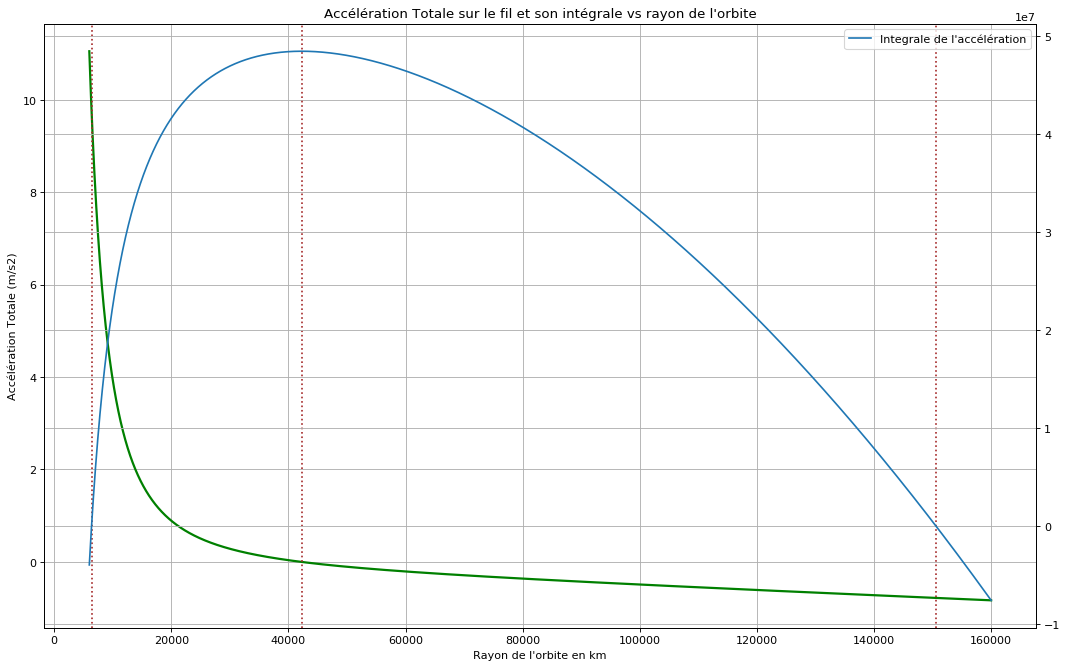

In [47]:
plt.close('all')

r = np.arange(6E6, 160E6, 1E3)
r_km = r*1E-3

fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(111)

#r_km = np.arange(Rt, 160000, 1)

plt.plot(r_km,  AccTotale(r), color="green",  linewidth=2, label="Accélération Totale")

plt.axvline(x=Rt*1E-3, linestyle=":", color="brown")
plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")
plt.axvline(x=Rf*1E-3, linestyle=":", color="brown")

plt.grid()

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Accélération Totale (m/s2)")

ax2 = ax1.twinx()
ax2.plot(r_km, IntegraleAcc(r), label="Integrale de l'accélération")
ax2.grid()
#ax2.set_ylabel("Intégrale de l'accélération, (m2/s2)", color='b')

plt.title("Accélération Totale sur le fil et son intégrale vs rayon de l'orbite")
plt.legend()
plt.savefig('images/acctotale-integrale.png')

plt.show()

Attention, 

# 3. Quels matériaux por le cable?
Calcul de la résistance du cable et de sa masse:
Nous arrivons ici 

Entre 6.378 km (Surface de la terre) et 42.241 km (Orbite géostationnaire), la tension du cable augmente progressivement, elle est maximale lorsque l'on atteint la station orbitale. Nous avons trouvé une formule qui donne cette tension, représentation graphique ci-dessous.   

#### Valeurs de densité et de tension maximale por différents matériaux:

In [49]:
densite_acier  = 7900  # kg/m3
densite_kevlar = 1440  # kg/m3
densite_cnt    = 1300  # kg/m3

Tmax_acier  = 5E9      # Pascals (N/m2)
Tmax_kevlar = 3.6E9    # Pascals (N/m2)
Tmax_cnt    = 139E9    # Pascals (N/m2)

### Calcul de résistance du cable:
Entre 6.378 km (Surface de la terre) et 42.241 km (Orbite géostationnaire), la tension du cable augmente progressivement, elle est maximale lorsque l'on atteint la station orbitale. Nous avons trouvé une formule qui donne cette tension, représentation graphique ci-dessous.


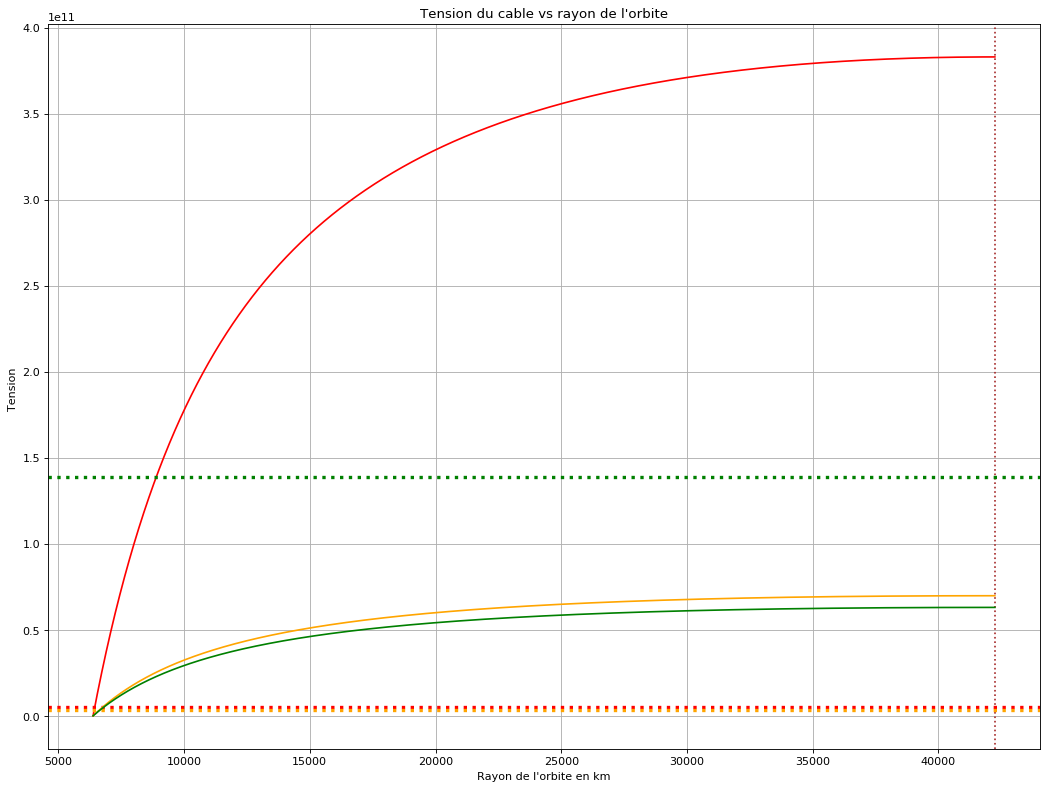

Tension maximum du cable au point Rg:
Acier: 383 Giga Pascals
Kevlar: 69 Giga Pascals
CNT: 63 Giga Pascals


In [137]:
#r = np.arange(6E6, 160E6, 1E3)
r = np.arange(Rt, Rg, 1E3)
r_km = r*1E-3

plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.axvline(x=Rg*1E-3, linestyle=":", color="brown")

#Acier:
plt.plot(r_km, IntegraleAcc(r)*densite_acier, color="red")
plt.axhline(y=Tmax_acier, linestyle=":", color="red",linewidth=3 )

#Kevlar:
plt.plot(r_km, IntegraleAcc(r)*densite_kevlar, color="orange")
plt.axhline(y=Tmax_kevlar, linestyle=":", color="orange", linewidth=3 )

#Carbon nanotubes:
plt.plot(r_km, IntegraleAcc(r)*densite_cnt, color="green")
plt.axhline(y=Tmax_cnt, linestyle=":", color="green", linewidth=3)

plt.xlabel("Rayon de l'orbite en km")
plt.ylabel("Tension ")
plt.grid()
plt.title("Tension du cable vs rayon de l'orbite")
plt.savefig('images/materiaux.png')

plt.show()

print("Tension maximum du cable au point Rg:" )

print("Acier:",  int(IntegraleAcc(Rg)*densite_acier*1E-9),  "Giga Pascals" )
print("Kevlar:", int(IntegraleAcc(Rg)*densite_kevlar*1E-9), "Giga Pascals")
print("CNT:",    int(IntegraleAcc(Rg)*densite_cnt*1E-9),    "Giga Pascals")

### Calcul de la masse du cable:
